## Libraries

In [1]:
import tempfile
import math
import os
from subprocess import call
import matplotlib.pyplot as plt
from f90nml import *
from array import *
import numpy as np
import pandas as pd 
import seaborn as sns
from statistics import *
import shutil
import sys
from matplotlib.ticker import FormatStrFormatter

#read in printFolder, makeDefNameList, newFolder, deleteFolder, readOutput from coreFunctions.py
from coreFunctions import *

#read in plotting functionality from plottingFunctions.py
from plottingFunctions import *

call("rm -rf tmp*",shell=True)

dfModel = []#will contain output from our model

## Enter Custom Inputs, then Run the Model

In [2]:
nameList = makeDefNamelist() #make namelist
nameList['ebm']['lverbose']=True #controls terminal output, used for debugging
nameList['ebm']['rBirth']=.0252;
nameList['ebm']['rDeath']=.0142857;
nameList['ebm']['rco2']=2.00e-4;
nameList['ebm']['coupled']=True;

#change runtime
nameList['ebm']['runTime'] = 1000#change runtime

#change distance
newA = 1#AU
nameList['ebm']['relsolcon']=newA**-2 #inverse square law for solar flux


#change pco2
#newPco2=284
newPco2=284*.1
nameList['ebm']['pco20']=newPco2/10**6

#run the program
dfModel, finalavgtemp, eqTime, eqTemp, equilibrium = runProgram("driver.exe",nameList)

if((equilibrium) and (finalavgtemp<=373.15) and (finalavgtemp>=273.15)): 
    print("Yay, Life!")
else:
    print("Boo, Extinction :(")

Equilibrium Reached at Temp=278.449. At time=23.0
Final Temp(K): 286.18
Final Temp(F): 55.45

Yay, Life!


## Model Analysis

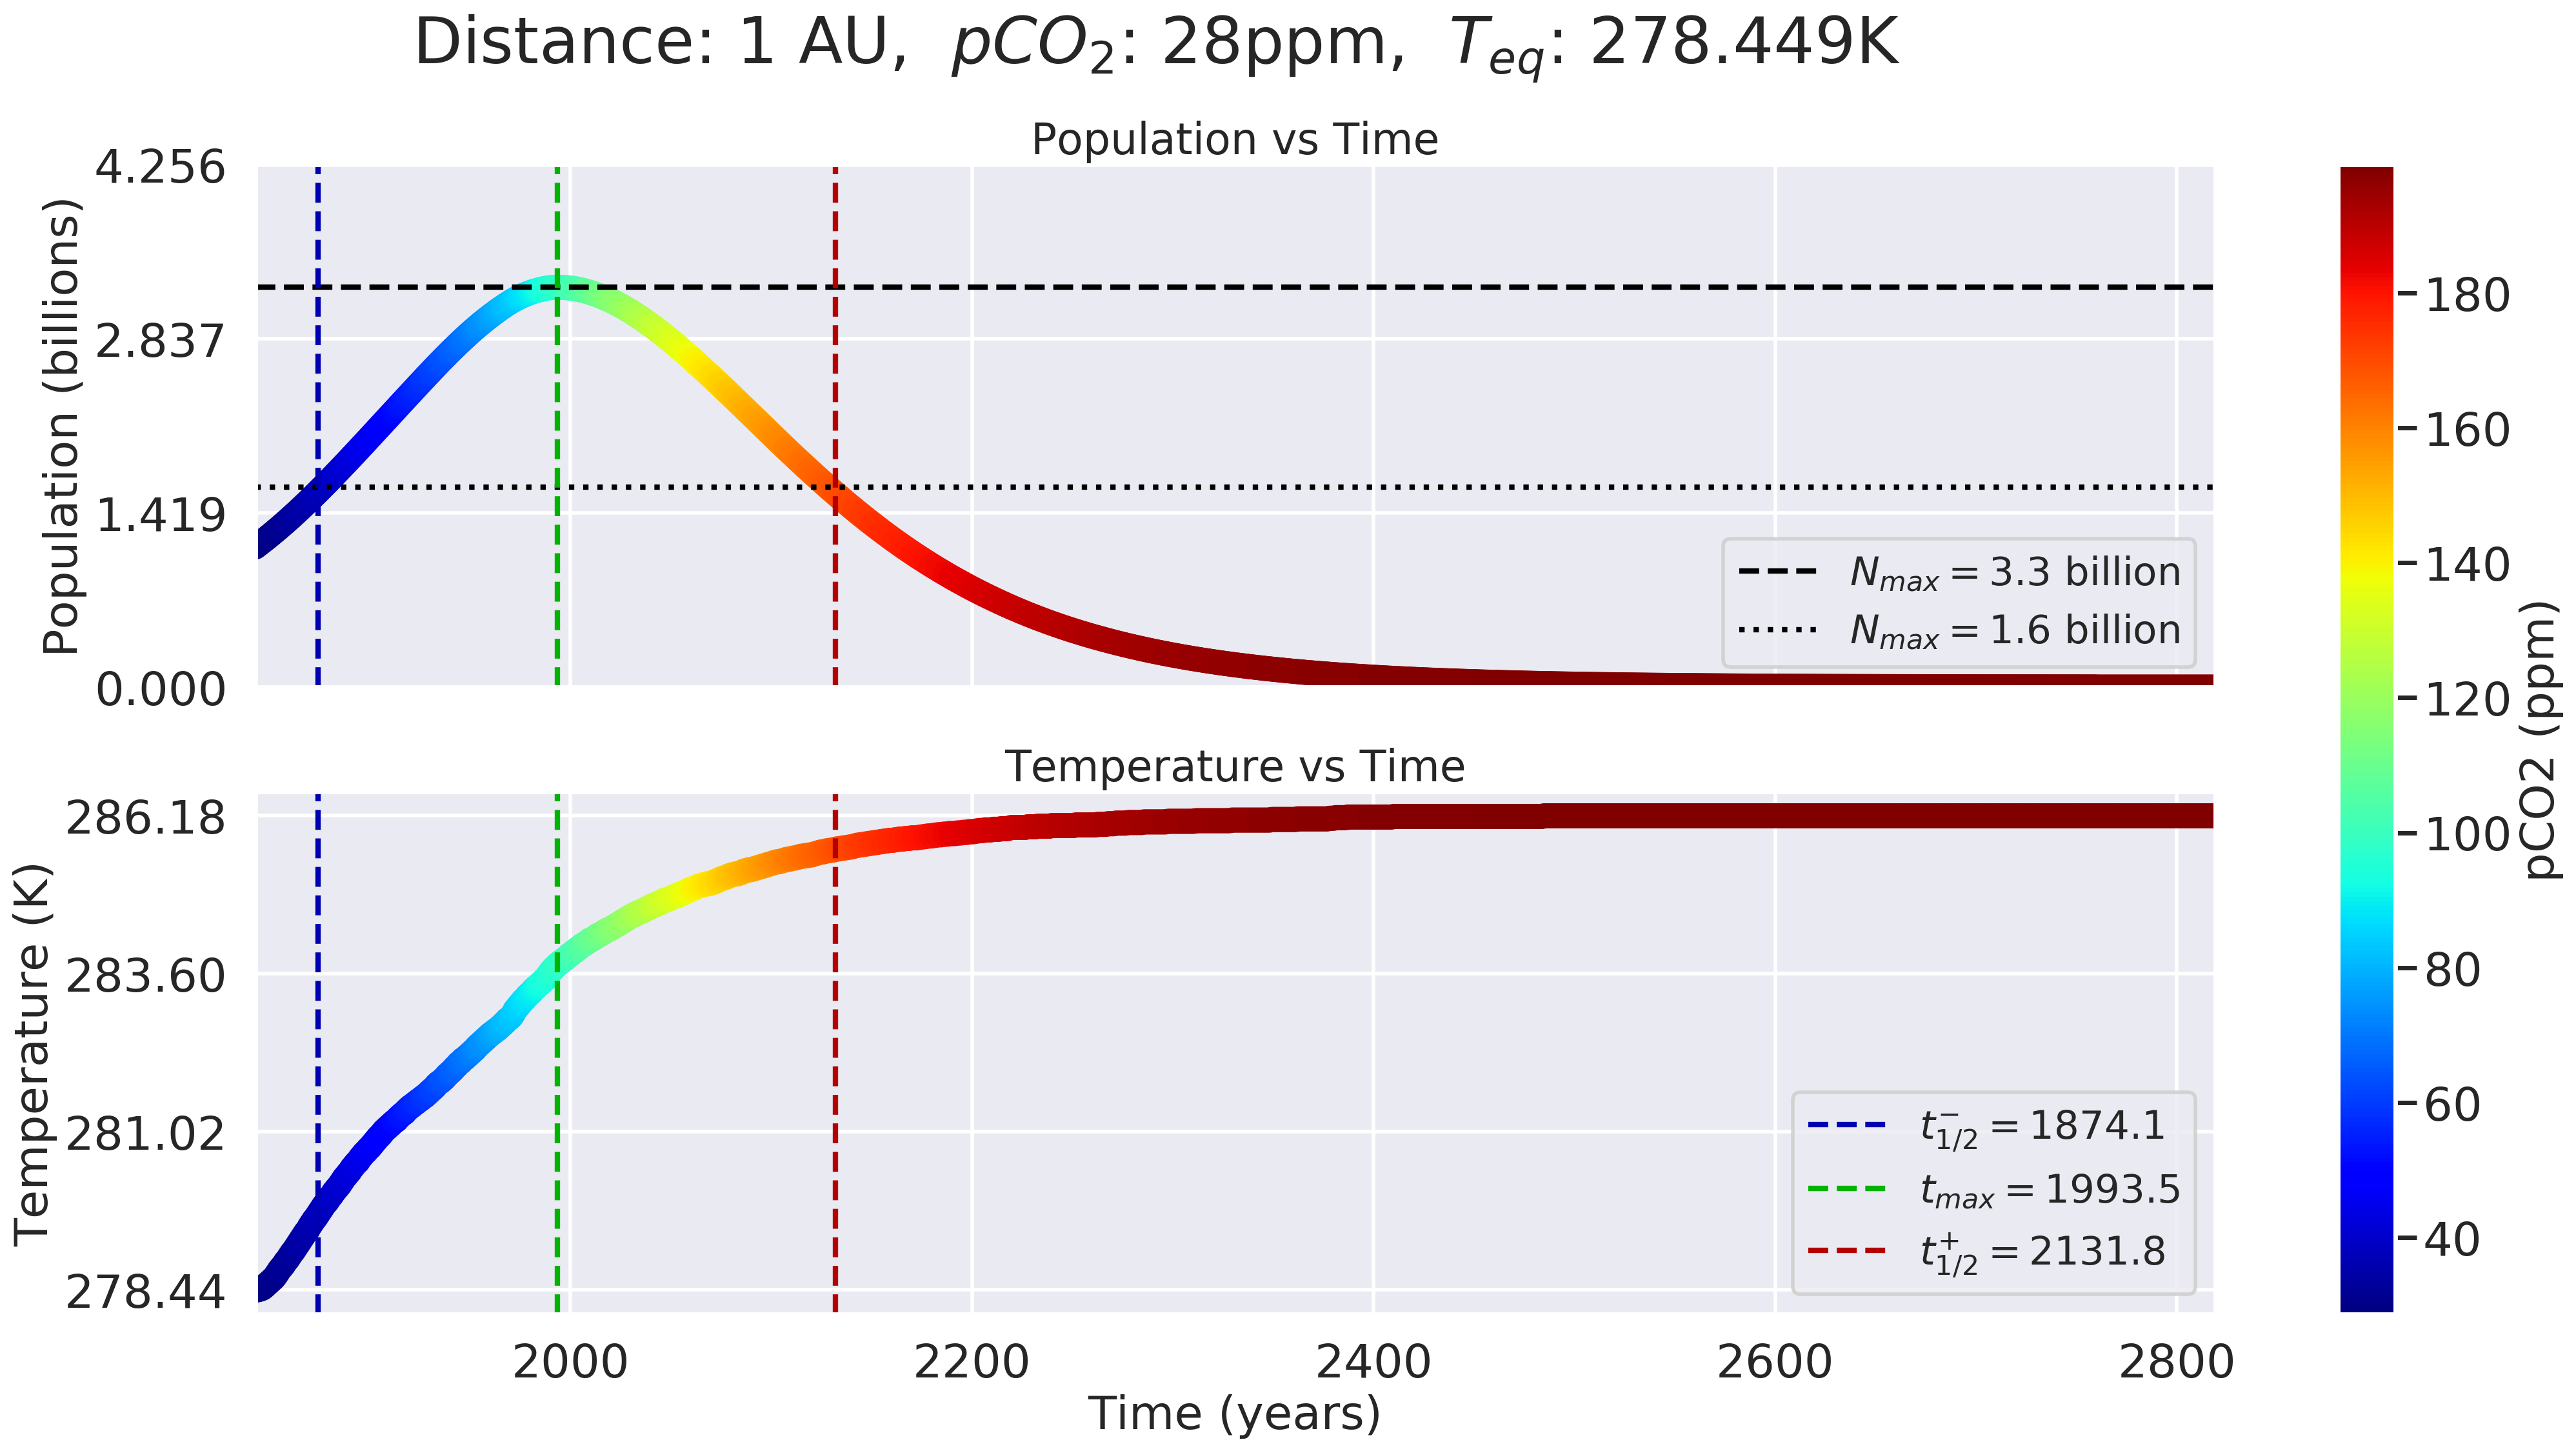

In [5]:
popStats = analyzeRun(dfModel,nameList,False)#get population statistics
popStats['maxPopPlot']=popStats['maxPop']+1;
inputs=[newA,newPco2]
#-----------------------------------PLOTS----------------------------------------------------------
if equilibrium: plotModelOutput(dfModel,inputs,eqTime,eqTemp,popStats)#plot the output of our model, colored by pco2 
#dfTemp = pd.read_csv('anomaly.csv');#data from NASA GISS: https://data.giss.nasa.gov/gistemp/graphs_v4/
#dfPopCo2 = pd.read_csv('world_stats.csv');#data from Frank, Adam, and Woodruff Sullivan.
#plotModelInput(nameList)#plot the temperature dependence on the growth rate
#plotTruePopCo2(dfPopCo2) #plot true population values vs pco2
#compareModelOutput(dfModel,dfTemp,dfPopCo2)#compare the models output to true data